# Project: Investigate a Dataset - tmdb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This dataset collected from The Movie Database (TMDB) contains information about a number of movies released between 1960 and 2015 in the following categories.

* id - unique identifier on the TMDB page
* imdb_id - unique identifier on IMDB (Internet Movies Database)
* popularity - popularity on the TMDB page 
* budget - budget in dollars
* revenue - gross revenue in dollars
* original_title - original movie title
* cast - prominent cast members
* homepage - website for the movie
* director -  directors of the movie
* tagline - movie tagline
* keywords - keywords associated with the movie
* runtime - length of movie in minutes
* genres - movie genres
* production_companies - companies involved in producing the movie
* release_date - date of movie's release
* vote_count - number of community votes cast to give the movie a user score out of 10
* vote_average - user score out of 10
* release year - year of movie's release
* budget_adj - inflation adjusted budget in dollars (unsure on which year, might be 2015)
* revenue_adj - inflation adjusted revenue in dollars (unsure on which year, might be 2015)


### Question(s) for Analysis

The dataset chosen is the tmdb-movies dataset. Potential dependant variables could be popularity and adjusted profit, which can be calculated from the adjusted budget and adjusted revenue, to assess profitability. Potential independant variables of interest could be the adjusted budget, movie cast, movie director, production studio or movie genre. The relationships between the dependant variables can be investigated as well.

Based on this I will investigate the dataset in the following categories.
1. Popularity and vote average
    1. Which movies have the greatest popularity and vote average?
    2. Which cast members have the greatest average popularity and average vote average?
    3. What is the average popularity and vote average per genre, and how many movies of each genre can be found in the dataset?
    4. Which directors have the greatest average popularity and average vote average?
    5. Which production companies have the greatest average popularity and average vote average?
    6. How does popularity and vote average relate?  
2. Profitability
    1. Which movies had the greatest profitability?
    2. Which cast members were part of the most profitable movies on average?
    3. What is the average profitability per genre?
    4. Which directors were part of the most profitable movies on average?
    5. Which productions companies were part of the most profitable movies on average?
    6. How does profitabilty relate to popularity and vote average?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


### Created Helper functions

The following helper functions were defined to reduce code repetition

In [3]:
# bar chart plotting function
def plot_bar_chart(n_bars,heights,labels,titles,title_sizes = [25,20,20],size=(20,10),color='c',tick_rotation=0):
    locations = [x for x in range(n_bars)]
    plt.figure(figsize=size)
    plt.bar(locations,heights,color=color)
    plt.title(titles[0],size=title_sizes[0])
    plt.xlabel(titles[1],size=title_sizes[1])
    plt.ylabel(titles[2],size=title_sizes[2])
    plt.yticks(size=20)
    plt.xticks(locations,labels,rotation=tick_rotation,size=20)


In [4]:
# scatter chart plotting function

def plot_scatter_chart(x,y,titles,color='c'):
    plt.scatter(x,y,color = 'c')
    plt.ylabel(titles[2])
    plt.xlabel(titles[1])
    plt.title(titles[0])


In [5]:
# splitting function for columns with multiple values split by a seperator

def split(df_in,column,sep):
    df_out = df_in.copy()
    df_out[column] = df_out[column].apply(lambda x: x.split(sep))
    return df_out.explode(column)


In [6]:
# function to drop columns and Nan in the remaining columns
def drop_columns_and_na(df_in,columns):
    df_out = df_in.copy()
    df_out.drop(columns,axis=1,inplace=True)
    df_out.dropna(inplace=True)
    return df_out

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
# read dataset and view first few rows
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The release_date needs to be converted to a datetime format.

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Row displayed to check the reformat worked.

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Dataset checked for null values.

### Data Cleaning

In [11]:
# remove extraneous columns
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','budget','revenue','runtime'],axis=1,inplace=True)
df.head(1)

,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Columns that were not of interest for the data analysis were dropped. The id, imdb_id, homepage, tagline, overview keywords and runtime columns were selected to be dropped for this reason. This also helps to cut down on the number of null values in the dataset.


To make fair numerical comparisons it makes more sense to use the budget_adj and revenue_adj values and so the non adjusted columns were dropped.


Describe can be used to check the overall statistics with the remaining numerical columns

In [12]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are zeros in the budget_adj and revenue_adj columns shown by describe which should be considered to be null.

In [13]:
for column in ['budget_adj','revenue_adj']:
    df[f"{column}"].replace(0,np.nan,inplace=True)

Zeros replaced with null values for budget_adj and revenue_adj.

In [14]:
# check the number of null values in the trimmed data set
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

There are a large number of missing budget_adj and revenue_adj values. Since these values are important to inferring profitabilty these rows should be dropped from the dataset.

Popularity has no missing values so it makes sense to perform analysis on this variable in a copy of the dataset without dropping null values in the budget_adj and revenue_adj comlumns. This is also suitable for analysing the dataset in terms of variables other than those two.

A second copy of the dataset with the null values of budget_adj and revenue_adj dropped will then be created for analysis based on these variables. I have chosen not to replace the 0 values for budget_adj and revenue_adj with mean values as these values are specific to each movie. When comparing these values with popularity and average score this second copy will be used

The dataset can be checked for duplicate rows before making copies.

In [15]:
#check for overall duplicates
df.duplicated().sum()

1

One was found overall. All of the individual columns can legitimately have identical values so only the overall duplicates will be dropped.

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 12)

### Popularity dataset and subsets

In [17]:
df_popular = df.drop(['budget_adj','revenue_adj'], axis=1)
df_popular.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

There are still some null values especially within the production_companies column. It makes sense to deal with this by creating subsets to analyse how cast, director, genres and production_companies affect popularity. The dataset can be used as is for any analysis that doesnt require these four columns.

In [18]:
# drop null apart from cast
df_popular_cast = drop_columns_and_na(df_popular,['director','genres','production_companies'])
df_popular_cast.shape

(10789, 7)

In [19]:
# drop null apart from director
df_popular_dir = drop_columns_and_na(df_popular,['cast','genres','production_companies'])
df_popular_dir.shape

(10821, 7)

In [20]:
# drop null apart from genres
df_popular_genres = drop_columns_and_na(df_popular,['cast','director','production_companies'])
df_popular_genres.shape

(10842, 7)

In [21]:
# drop null apart from production_companies
df_popular_prod = drop_columns_and_na(df_popular,['cast','director','genres'])
df_popular_prod.shape

(9835, 7)

The four subsets have columns where there are multiple entries seperated by pipe '|' characters. The split helper function can process them by putting each entry on its own row. 

In [22]:
df_popular_cast = split(df_popular_cast,'cast','|')
df_popular_cast.shape



(52568, 7)

In [23]:
df_popular_genres = split(df_popular_genres,'genres','|')
df_popular_genres.shape


(26955, 7)

In [24]:
df_popular_dir = split(df_popular_dir,'director','|')
df_popular_dir.shape

(11891, 7)

In [25]:
df_popular_prod = split(df_popular_prod,'production_companies','|')
df_popular_prod.shape

(23225, 7)

The popularity datasets are ready to be analysed

### budget_adj and revenue_adj dataset and subsets

In [26]:
df_profit = df.copy().dropna(subset=['budget_adj','revenue_adj'])
# check for the number of null values remaining
df_profit.isnull().sum()

popularity               0
original_title           0
cast                     4
director                 1
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

There are not many rows left with null values so the rest can be dropped as well.

In [27]:
df_profit.dropna(inplace=True)

In [28]:
df_profit.shape

(3805, 12)

Profit adjusted is calculated from the revenue_adj and budget_adj.

In [29]:
profit = df['revenue_adj'] - df['budget_adj']
df_profit.insert(len(df.columns), "profit_adj",profit)
df_profit.head(1)

,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


These values are very large and can be converted into millions for an easier to read indicator

In [30]:
df_profit['revenue_adj'] = df_profit['revenue_adj']/1_000_000
df_profit['budget_adj'] = df_profit['budget_adj']/1_000_000
df_profit['profit_adj'] = df_profit['profit_adj']/1_000_000

In [31]:

df_profit_cast = split(df_profit,'cast','|')


In [32]:
df_profit_cast.shape

(18979, 13)

In [33]:
df_profit_genres = split(df_profit,'genres','|')


In [34]:
df_profit_genres.shape

(10180, 13)

In [35]:
df_profit_dir = split(df_profit,'director','|')

In [36]:
df_profit_dir.shape

(4109, 13)

In [37]:
df_profit_prod = split(df_profit,'production_companies','|')


In [38]:
df_profit_prod.shape

(10581, 13)

The profit data set and subsets are now ready for analysis

<a id='eda'></a>
## Exploratory Data Analysis

### Popularity

#### 1. Which movies have the greatest popularity and vote average?

In [39]:
df_popular['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

Popularity has a large number of very small values less than one. This means there is little point to looking into the least popular movies as there will be a large number with very simiilar values. The popularity is referring to how popular the movie is on the movies database website. The top 10 most popular movies based on this metric can be shown.

In [40]:
df_popular_1 = df_popular.nlargest(10,'popularity')
df_popular_1

,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
629,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014
630,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
631,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977
632,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
633,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,3590,6.6,2014


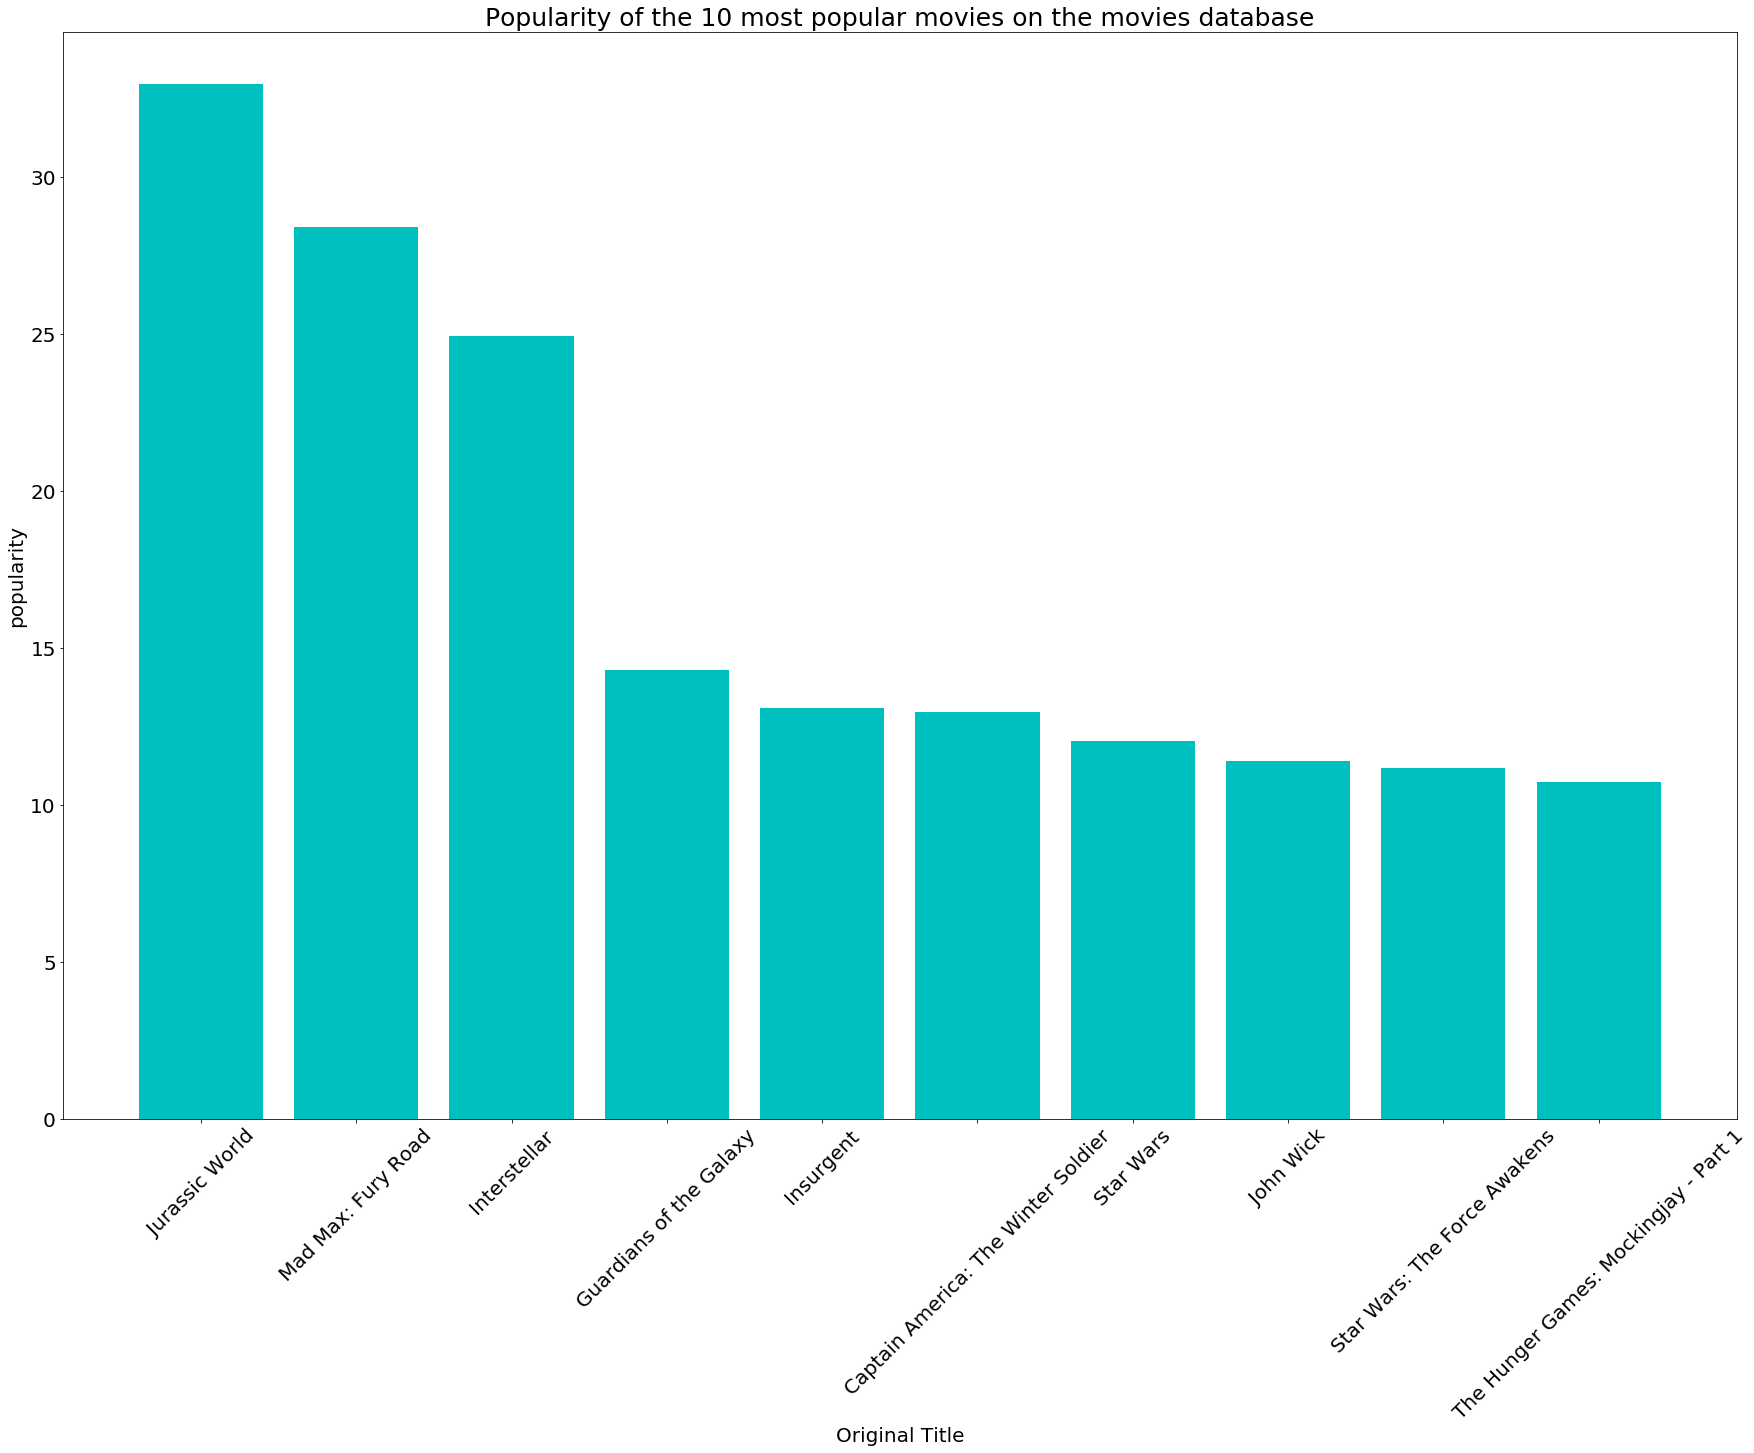

In [41]:
titles = ['Popularity of the 10 most popular movies on the movies database','Original Title','popularity']
plot_bar_chart(10,df_popular_1['popularity'],df_popular_1['original_title'],titles,size=(30,20),tick_rotation=45)

From this it can be seen that Jurassic World is the most popular movie on the movies database with 32.9. 

The vote average indicates how well a movie was recieved among viewers.

In [42]:
df_popular_2 = df_popular.nlargest(10,'vote_average')
df_popular_2.head(1)


,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,Documentary,NaN,2011-09-03,14,9.2,2011


The documentary "The Story of Film: An odyssey" has the greatest vote average.

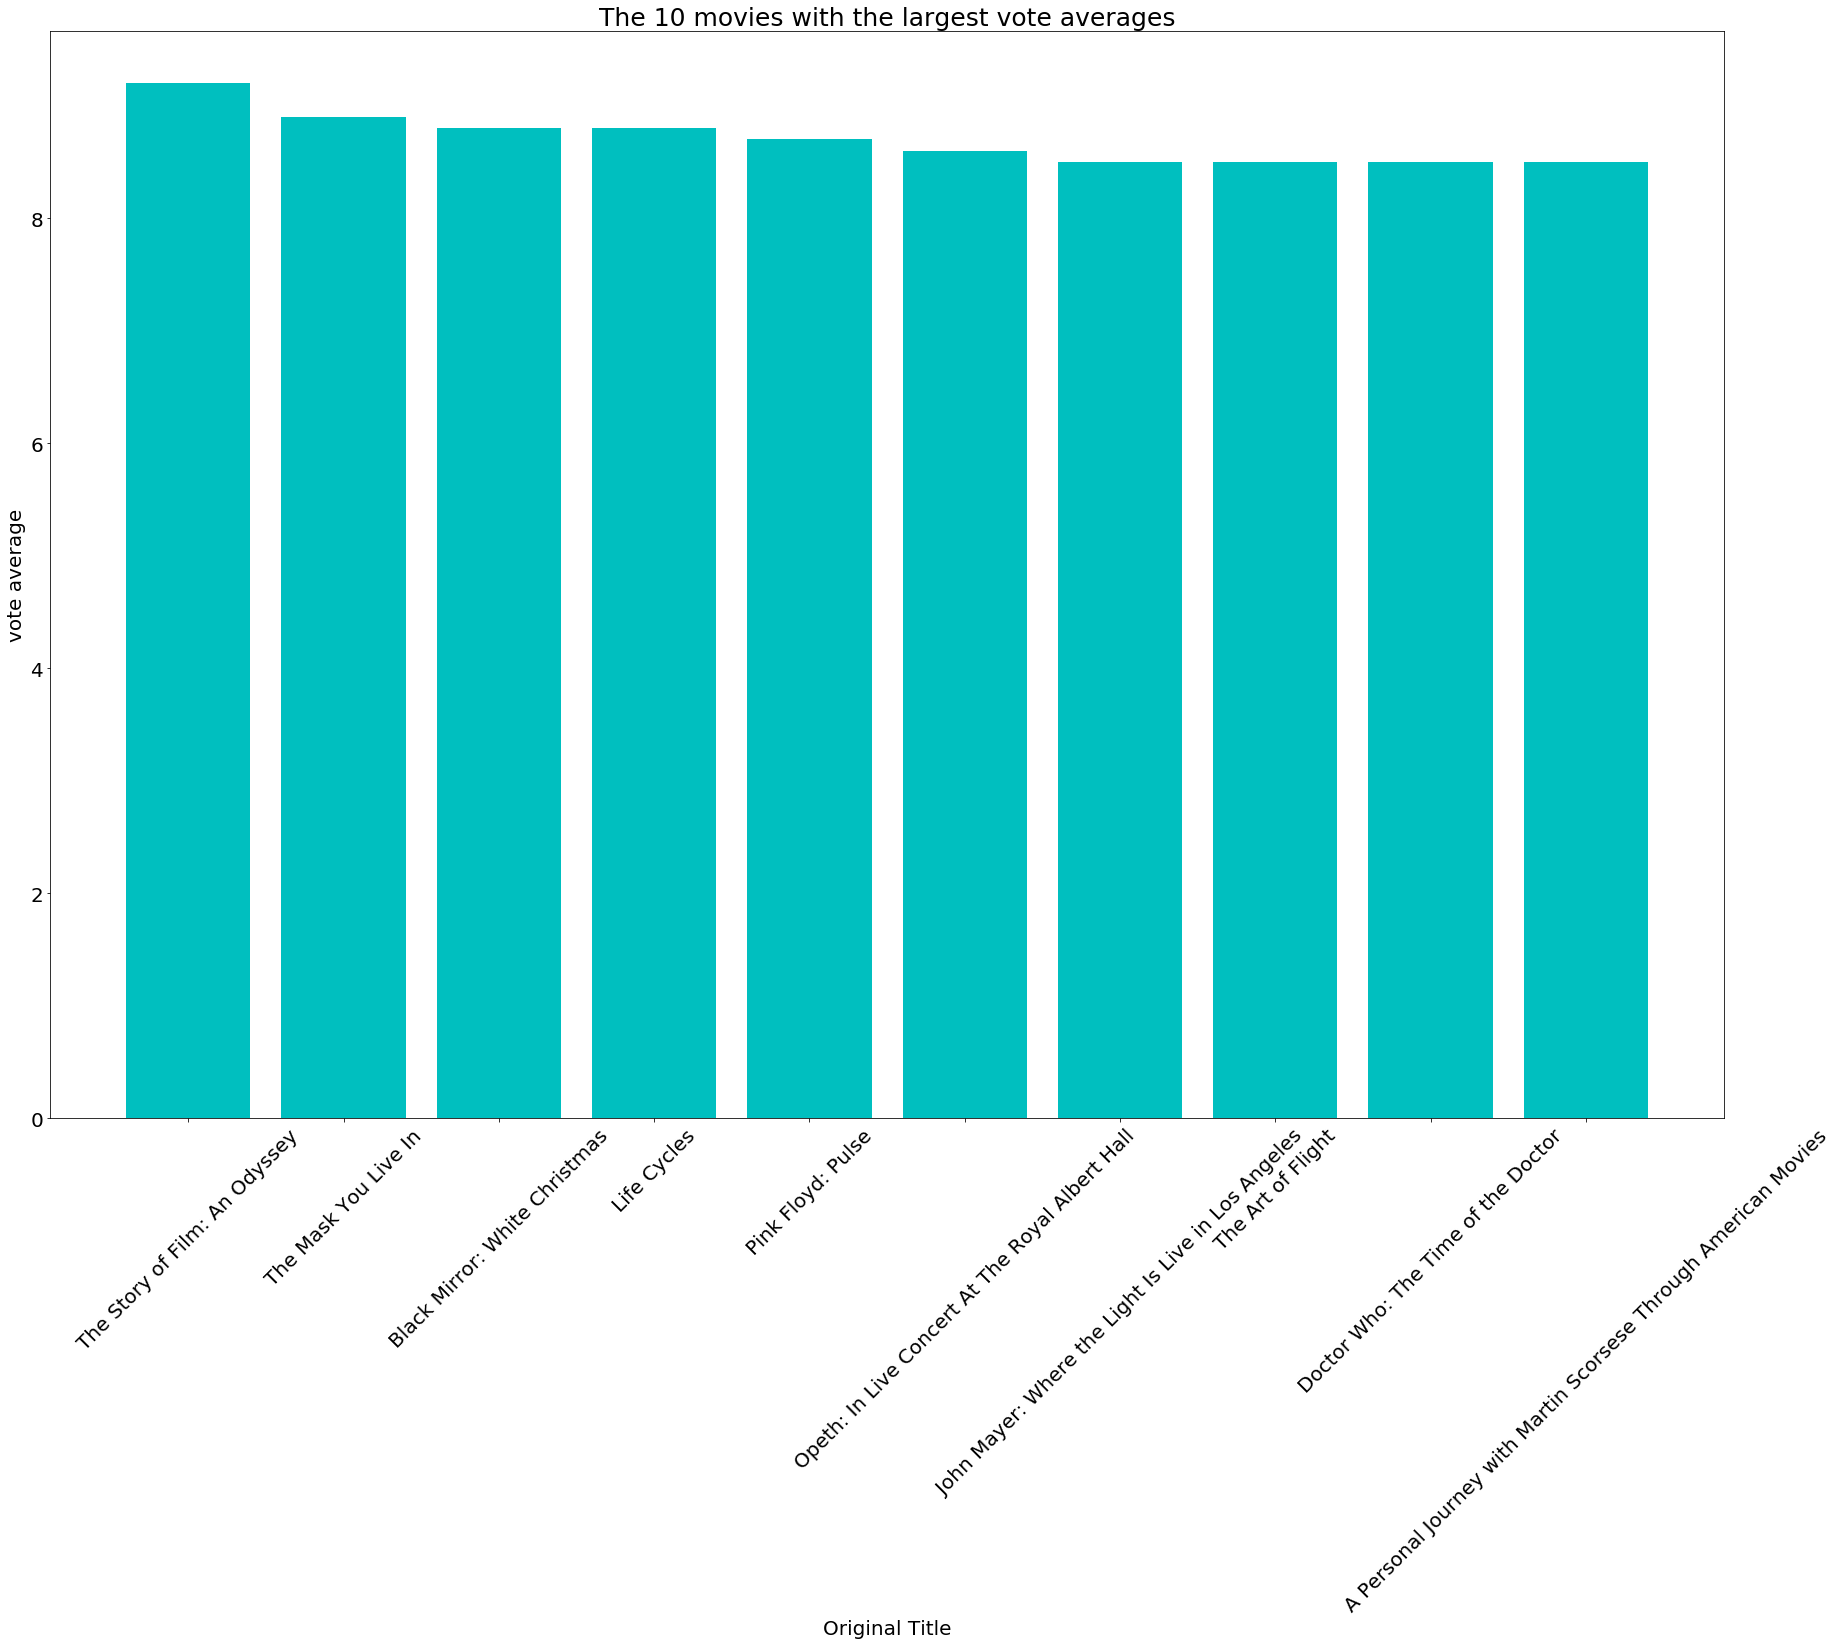

In [43]:
titles = ['The 10 movies with the largest vote averages','Original Title','vote average']
plot_bar_chart(10,df_popular_2['vote_average'],df_popular_2['original_title'],titles,size=(30,20),tick_rotation=45)

The vote counts for these can be looked at as well.

In [44]:
df_popular_2['vote_count']

3894    14
538     11
1200    41
2269    27
6911    23
2401    10
3224    16
3690    60
5830    26
8221    11
Name: vote_count, dtype: int64

All of these have a low vote count. In these cases it may be that a low sample size has overvalued the average score. 

#### 2. Which cast members have the greatest average popularity and average vote average?

In [45]:
cast_averages = df_popular_cast.groupby('cast').mean().reset_index()
cast_averages.head(1)

,cast,popularity,vote_count,vote_average,release_year
0,Larry Mullen Jr.,0.22968,13.0,7.05,1996.5


In [46]:
df_cast_1 = cast_averages.nlargest(10,'popularity')
df_cast_1

,cast,popularity,vote_count,vote_average,release_year
9429,Josh Helman,28.419936,6185.000000,7.100000,2015.000000
3898,Daisy Ridley,11.173104,5292.000000,7.500000,2015.000000
7182,Hugh Keays-Byrne,10.211471,2287.666667,6.266667,1997.666667
4037,Daniel Henney,8.691294,4185.000000,7.800000,2014.000000
15889,Ryan Potter,8.691294,4185.000000,7.800000,2014.000000
2344,Brian Dobson,8.411577,21.000000,5.900000,2011.000000
6569,Gloria Foster,7.753899,6351.000000,7.800000,1999.000000
1229,Ansel Elgort,7.703183,2434.500000,7.050000,2014.500000
2069,Blake Cooper,7.137273,3425.000000,7.000000,2014.000000
10341,Ki Hong Lee,7.137273,3425.000000,7.000000,2014.000000


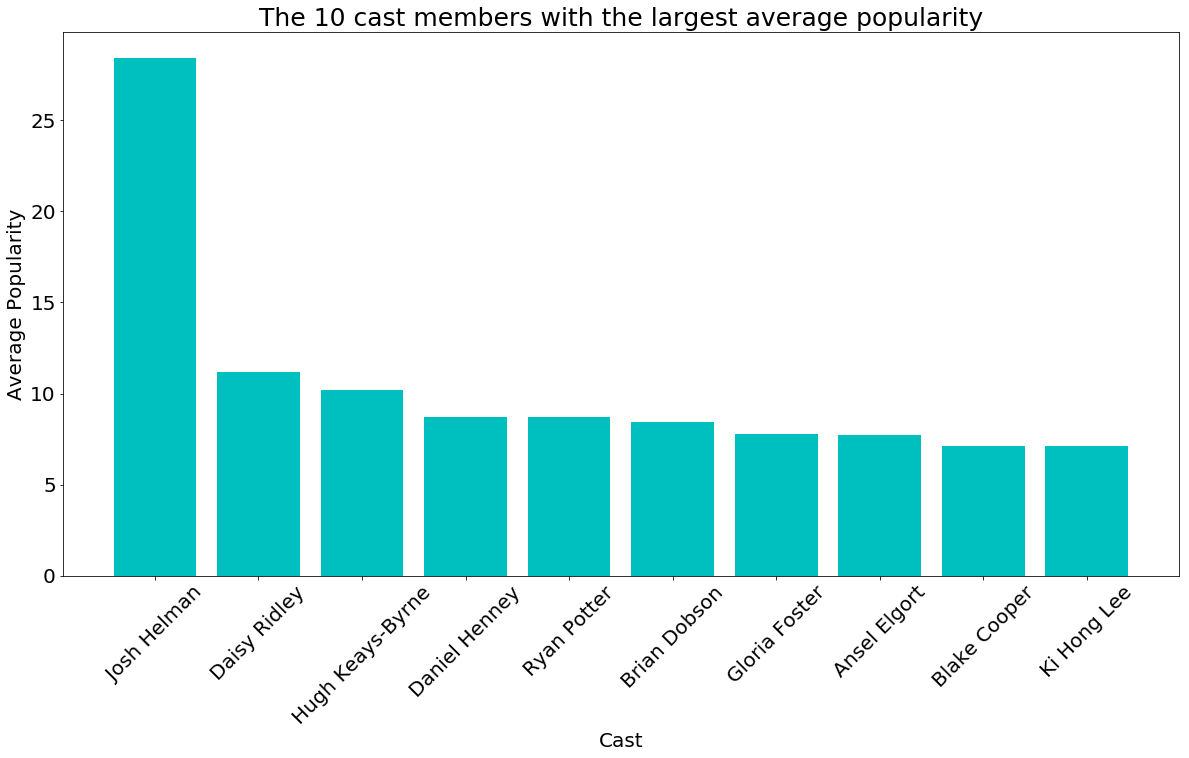

In [47]:
titles=['The 10 cast members with the largest average popularity','Cast','Average Popularity']
plot_bar_chart(10,df_cast_1['popularity'],df_cast_1['cast'],titles,tick_rotation=45)

Josh Helman is the most popular by quite a margin. This is likely due to him only appearing in one of the most popular movies and not in any of the low popularity ones.

In [48]:
df_popular_cast[df_popular_cast['cast'] == 'Josh Helman']

,popularity,original_title,cast,release_date,vote_count,vote_average,release_year
1,28.419936,Mad Max: Fury Road,Josh Helman,2015-05-13,6185,7.1,2015


Josh Helman is only a cast member in Mad Max: Fury road with a popularity of 28.4 and so this is why he has a highest popularity as nothing else brings down the average.

In [49]:
df_cast_2 = cast_averages.nlargest(10,'vote_average')
df_cast_2

,cast,popularity,vote_count,vote_average,release_year
217,Agnes de Mille,0.006925,14.0,9.2,2011.0
2679,Cari Beauchamp,0.006925,14.0,9.2,2011.0
8167,Jean-Michel Frodon,0.006925,14.0,9.2,2011.0
11891,Mark Cousins,0.006925,14.0,9.2,2011.0
13915,Oona Chaplin,0.129531,41.0,8.8,2014.0
9202,Jon Carin,0.212010,23.0,8.7,2006.0
15973,Sam Brown,0.212010,23.0,8.7,2006.0
6087,Fredrik Ã…kesson,0.067753,10.0,8.6,2010.0
12019,"Martin ""Axe"" Axenrot",0.067753,10.0,8.6,2010.0
12048,Martin Mendez,0.067753,10.0,8.6,2010.0


Here the top 10 cast per vote_average can be found.

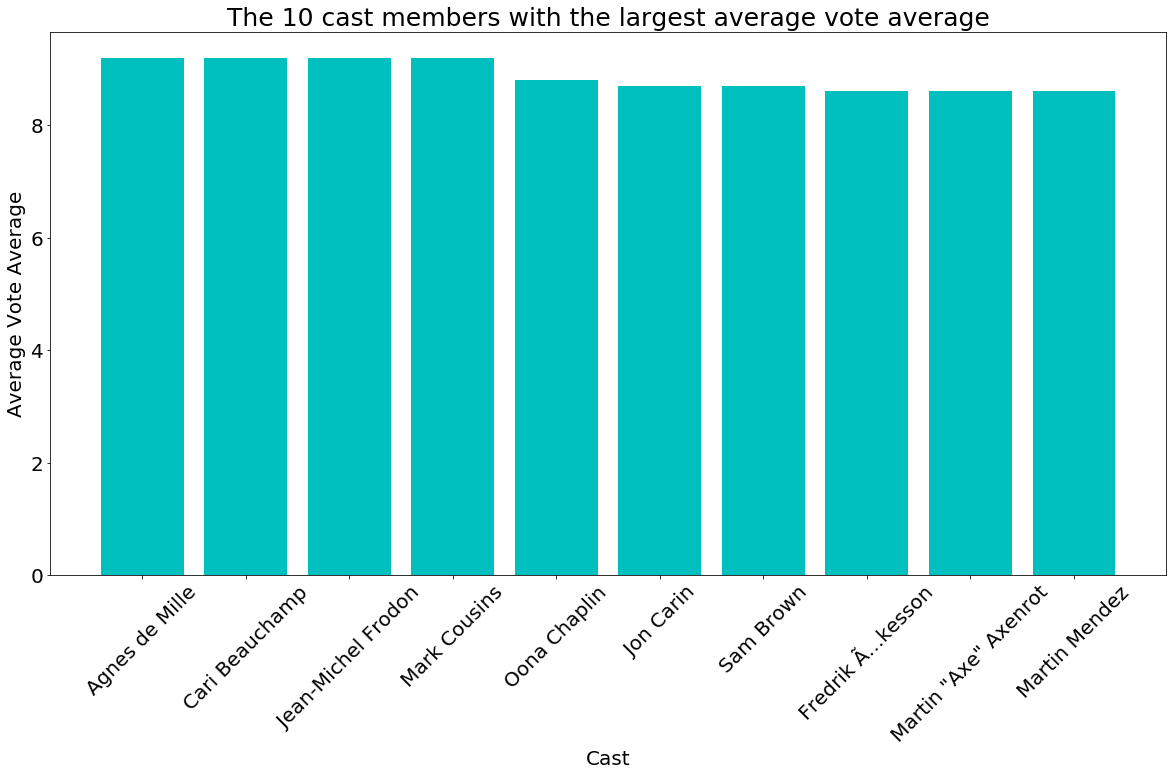

In [50]:
titles=['The 10 cast members with the largest average vote average','Cast','Average Vote Average']
plot_bar_chart(10,df_cast_2['vote_average'],df_cast_2['cast'],titles,tick_rotation=45)

Agnes de Mille has the greatest averge vote average.
Once again low vote counts may have overvalued these cast members.

#### 3. What is the average popularity and vote average per genre, and how many movies of each genre can be found in the dataset?

In [51]:
df_genres_averages = df_popular_genres.groupby('genres').mean().reset_index()
df_genres_averages.sort_values(by='popularity',ascending=False,inplace=True)
df_genres_averages

,genres,popularity,vote_count,vote_average,release_year
1,Adventure,1.154259,513.125085,5.940585,1999.388851
15,Science Fiction,1.001548,437.096013,5.665582,1999.978845
8,Fantasy,0.992840,420.741266,5.863537,2000.292576
0,Action,0.926274,392.993708,5.787752,2000.056208
2,Animation,0.852182,303.000000,6.403147,2003.995708
7,Family,0.786668,272.320877,5.997563,2000.774167
4,Crime,0.744930,278.805022,6.124889,1999.491137
17,Thriller,0.741563,255.484348,5.750671,2001.693498
18,War,0.727683,270.733333,6.297778,1996.096296
13,Mystery,0.690012,236.998765,5.946790,1999.850617


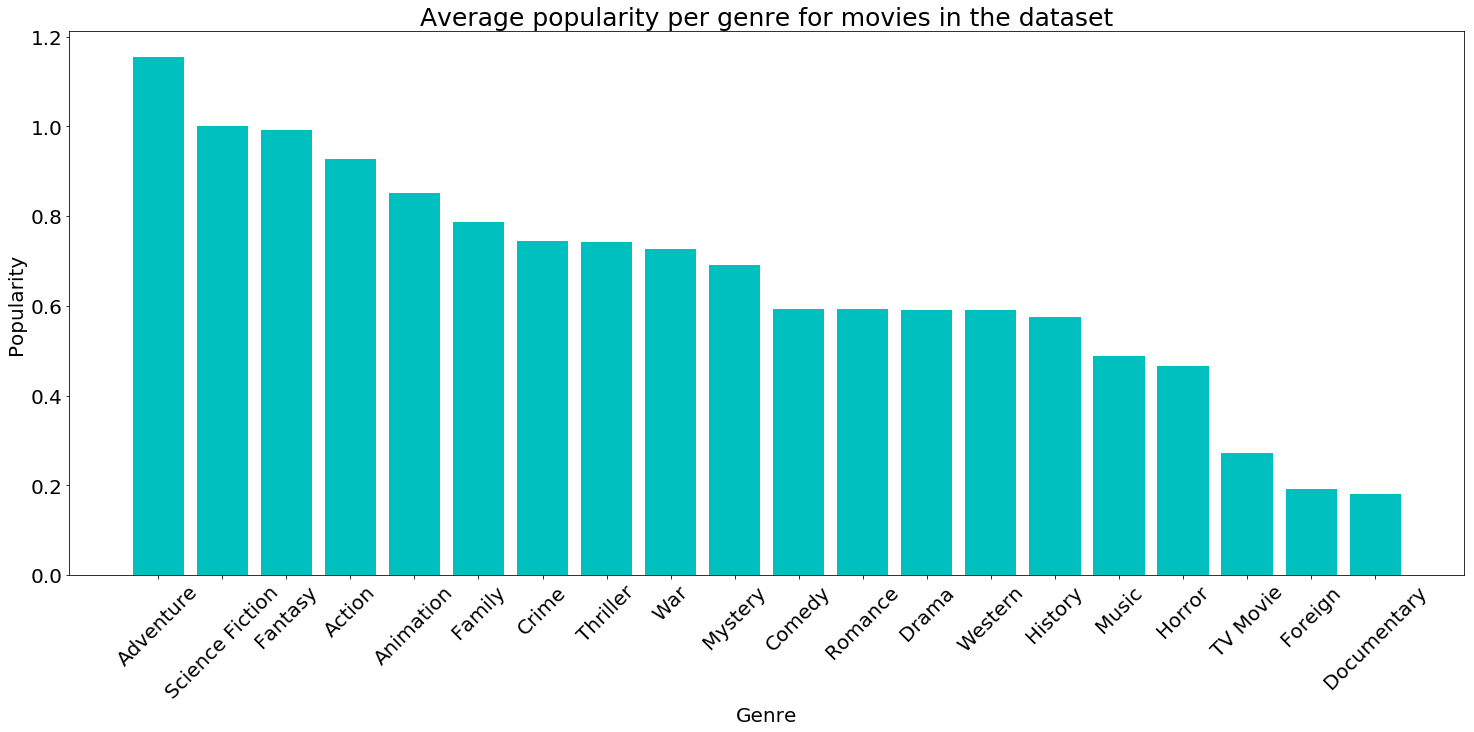

In [52]:
titles=['Average popularity per genre for movies in the dataset','Genre','Popularity']
plot_bar_chart(20,df_genres_averages['popularity'],df_genres_averages['genres'],titles,size=(25,10),tick_rotation=45)

Adventure is the most popular on average and documentary is the least popular. There is small variation due to the large number of movies with low popularity.

In [53]:
df_genres_averages.sort_values(by='vote_average',ascending=False,inplace=True)
df_genres_averages

,genres,popularity,vote_count,vote_average,release_year
5,Documentary,0.181432,35.105769,6.908462,2008.313462
12,Music,0.487321,124.340686,6.480392,2000.196078
10,History,0.575936,183.772455,6.410479,1997.497006
2,Animation,0.852182,303.000000,6.403147,2003.995708
18,War,0.727683,270.733333,6.297778,1996.096296
6,Drama,0.591495,182.544538,6.165546,2000.929202
4,Crime,0.744930,278.805022,6.124889,1999.491137
19,Western,0.590615,205.739394,6.083030,1986.915152
14,Romance,0.592082,166.070678,6.042874,2000.438668
7,Family,0.786668,272.320877,5.997563,2000.774167


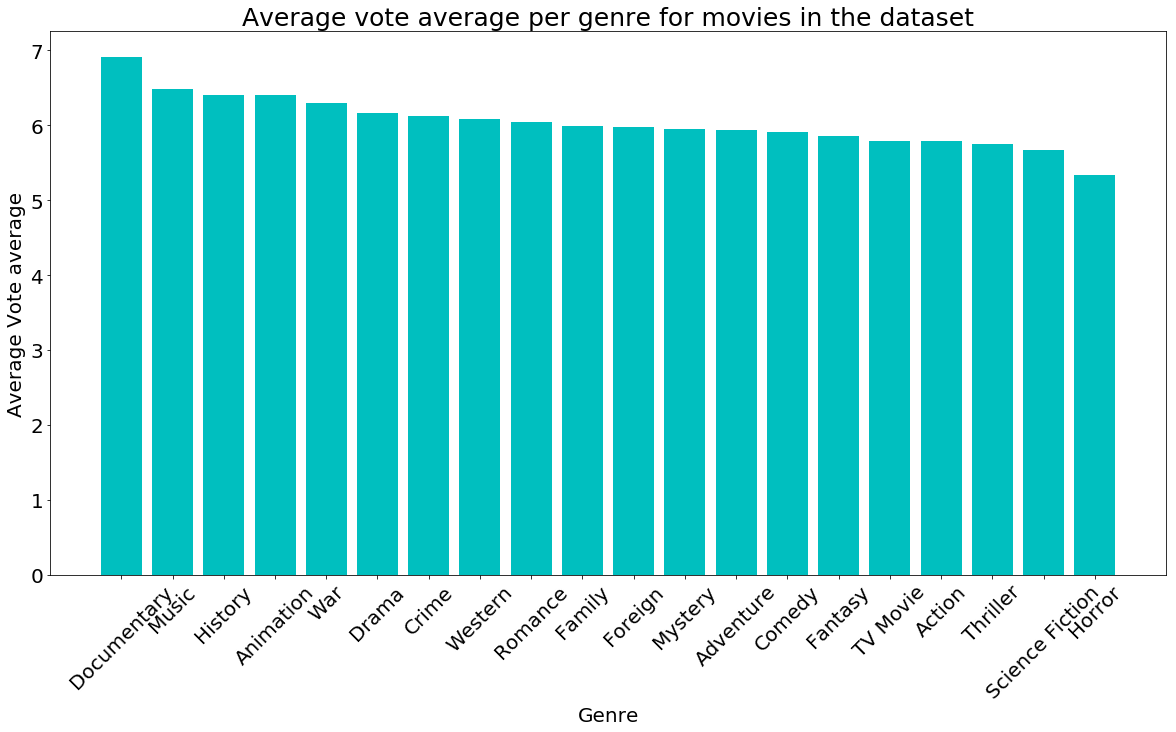

In [54]:
titles=['Average vote average per genre for movies in the dataset','Genre','Average Vote average']
plot_bar_chart(20,df_genres_averages['vote_average'],df_genres_averages['genres'],titles,tick_rotation=45)

Documentary has the highest average vote average and horror has the lowest. Once again this could be influenced by some low vote counts allowing for over and undervalued movies.

In [55]:
df_popular_genres['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

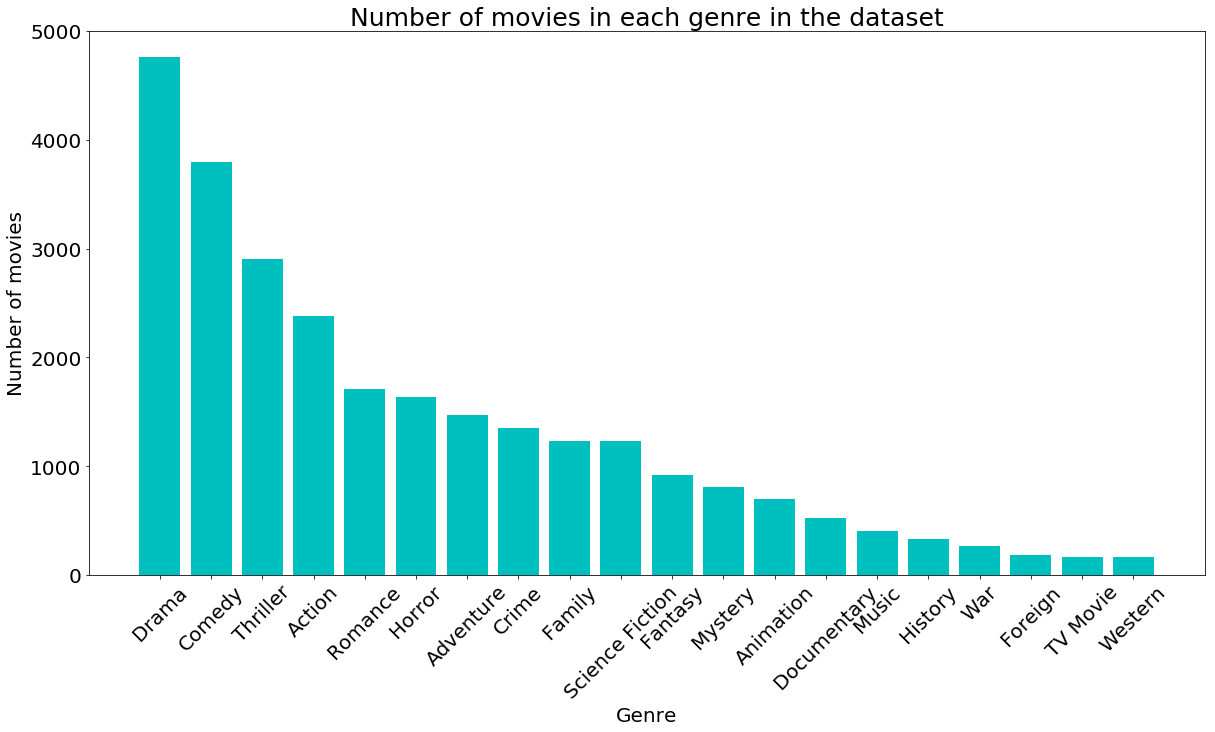

In [56]:
titles=['Number of movies in each genre in the dataset','Genre','Number of movies']
plot_bar_chart(20,df_popular_genres['genres'].value_counts(),df_popular_genres['genres'].value_counts().index,titles,tick_rotation=45)

Here the number of movies in each genre can be seen. Genres with lower counts such as Western and Tv Movie are more likely to have averages over or undervalued by a small number of low or high values.

#### 4. Which directors have the greatest average popularity and average vote average?

In [57]:
dir_averages = df_popular_dir.groupby('director').mean().reset_index()
dir_averages.head(1)


,director,popularity,vote_count,vote_average,release_year
0,FrÃ©dÃ©ric Jardin,0.434506,28.0,5.9,2011.0


Averages for directors this time.

In [58]:
df_dir_1 = dir_averages.nlargest(10,'popularity')
df_dir_1

,director,popularity,vote_count,vote_average,release_year
962,Colin Trevorrow,16.696886,2951.5,6.60,2013.5
760,Chad Stahelski,11.422751,2712.0,7.00,2014.0
1201,David Leitch,11.422751,2712.0,7.00,2014.0
2816,Juno John Lee,8.411577,21.0,5.90,2011.0
102,Alan Taylor,6.883129,2811.5,6.30,2014.0
4030,Peter Richardson,6.668990,11.0,5.50,1997.0
906,Christopher Nolan,6.195521,4175.9,7.47,2005.2
137,Alex Garland,6.118847,2854.0,7.60,2015.0
3899,Patrick Tatopoulos,5.806897,979.0,6.20,2009.0
5225,Wes Ball,5.553082,2637.0,6.70,2014.5


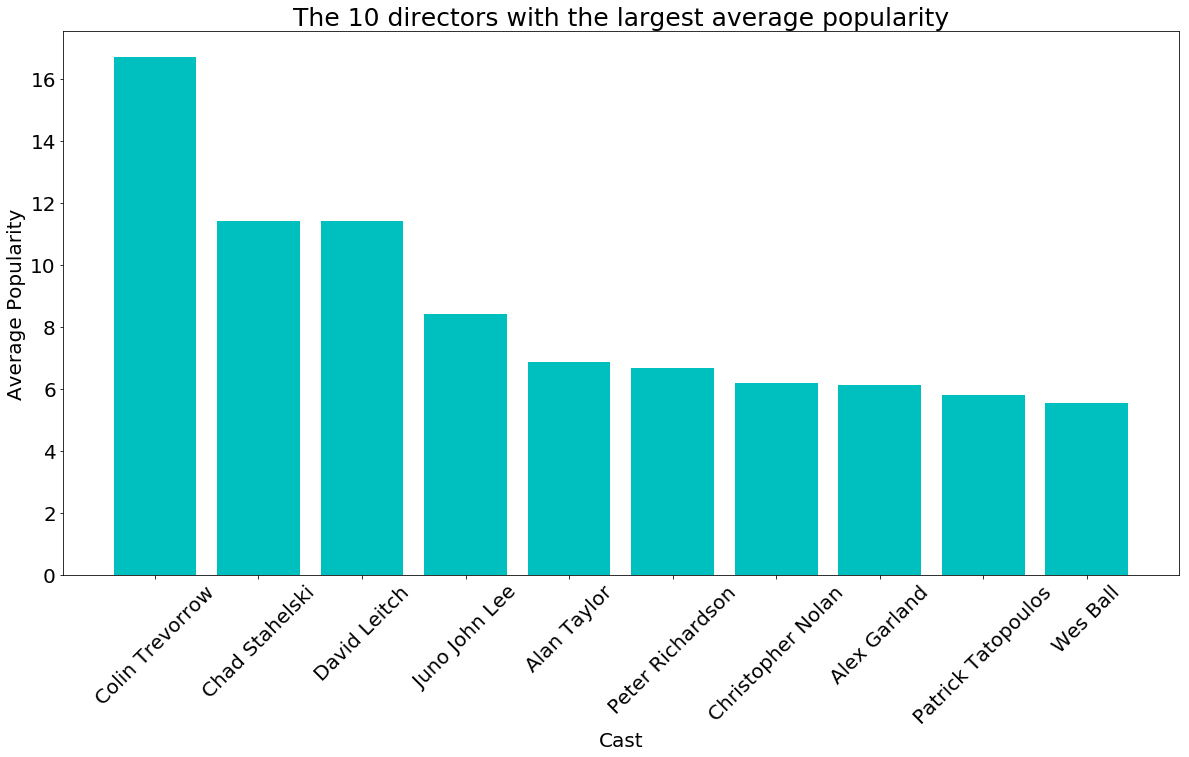

In [59]:
titles = ['The 10 directors with the largest average popularity','Cast','Average Popularity']
plot_bar_chart(10,df_dir_1['popularity'],df_dir_1['director'],titles,tick_rotation=45)

Colin Trevorrow has the greatest average Popularity, the lowest will not be investigated due to the many almost 0 values.

In [60]:
df_dir_2 = dir_averages.nlargest(10,'vote_average')
df_dir_2

,director,popularity,vote_count,vote_average,release_year
3290,Mark Cousins,0.006925,14.0,9.2,2011.0
1322,Derek Frankowski,0.222293,27.0,8.8,2010.0
1213,David Mallet,0.212010,23.0,8.7,2006.0
998,Curt Morgan,0.321341,60.0,8.5,2011.0
2174,James Payne,0.248944,26.0,8.5,2013.0
3514,Michael Henry Wilson,0.194889,11.0,8.5,1995.0
4557,Saul Swimmer,0.302908,14.0,8.5,1981.0
332,Anthony Mandler,0.107333,24.0,8.4,2013.0
828,Chris Hegedus,0.260602,13.0,8.4,1989.0
1156,David Dawkins,0.260602,13.0,8.4,1989.0


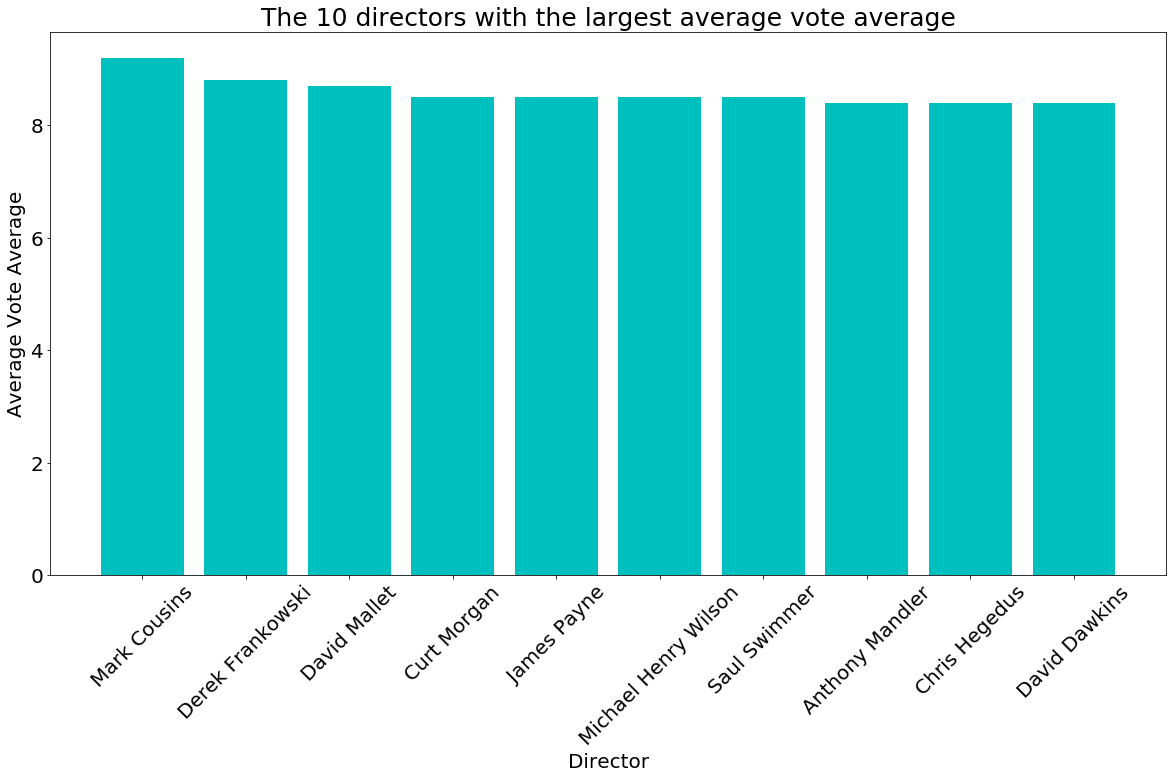

In [61]:
titles = ['The 10 directors with the largest average vote average','Director','Average Vote Average']
plot_bar_chart(10,df_dir_2['vote_average'],df_dir_2['director'],titles,tick_rotation=45)

Mark Cousins has the greatest average vote average.

In [62]:
df_dir_3 = dir_averages.nsmallest(10,'vote_average')
df_dir_3

,director,popularity,vote_count,vote_average,release_year
1947,Harold P. Warren,0.035919,15.0,1.5,1966.0
604,Brett Kelly,0.079281,13.0,2.0,2012.0
2171,James Nguyen,0.150035,30.0,2.1,2010.0
2828,Justin Russell,0.041297,10.0,2.2,2012.0
3068,Lawrence Kasanoff,0.111351,12.0,2.2,2012.0
5162,Valerie Breiman,0.153473,18.0,2.3,1989.0
3952,Paul Tarnopol,0.118137,14.0,2.4,2014.0
4615,Sean Olson,0.134357,10.0,2.4,2013.0
2402,Jessica Nilsson,0.327022,34.0,2.5,2005.0
240,Andrew Jones,0.212872,17.0,2.6,2015.0


For interest here are the directors with the smallest average vote averages, the greatest and smallest values all belong to directors with low vote_count on average.

#### 5. Which production companies have the greatest average popularity and average vote average?

In [63]:
prod_averages = df_popular_prod.groupby('production_companies').mean().reset_index()
prod_averages.head(1)


,production_companies,popularity,vote_count,vote_average,release_year
0,"""DIA"" Productions GmbH & Co. KG",1.626534,152.0,5.7,2003.0


Averages for production_companies.

In [64]:
df_prod_1 = prod_averages.nlargest(10,'popularity')
df_prod_1

,production_companies,popularity,vote_count,vote_average,release_year
1125,Bulletproof Cupid,14.311205,5612.000000,7.900000,2014.000000
2789,Fuji Television Network,12.777401,2692.333333,6.233333,2014.666667
1906,DefyNite Films,11.422751,2712.000000,7.000000,2014.000000
7241,Truenorth Productions,11.173104,5292.000000,7.500000,2015.000000
62,3Foot7,10.174599,3110.000000,7.100000,2014.000000
588,Atman Entertainment,8.947905,5923.000000,8.100000,1999.000000
4089,Linson Films,8.947905,5923.000000,8.100000,1999.000000
1066,Bristol Automotive,8.110711,3478.000000,8.000000,2014.000000
1867,Dayday Films,7.137273,3425.000000,7.000000,2014.000000
6751,Syncopy,7.050715,5032.000000,7.344444,2008.888889


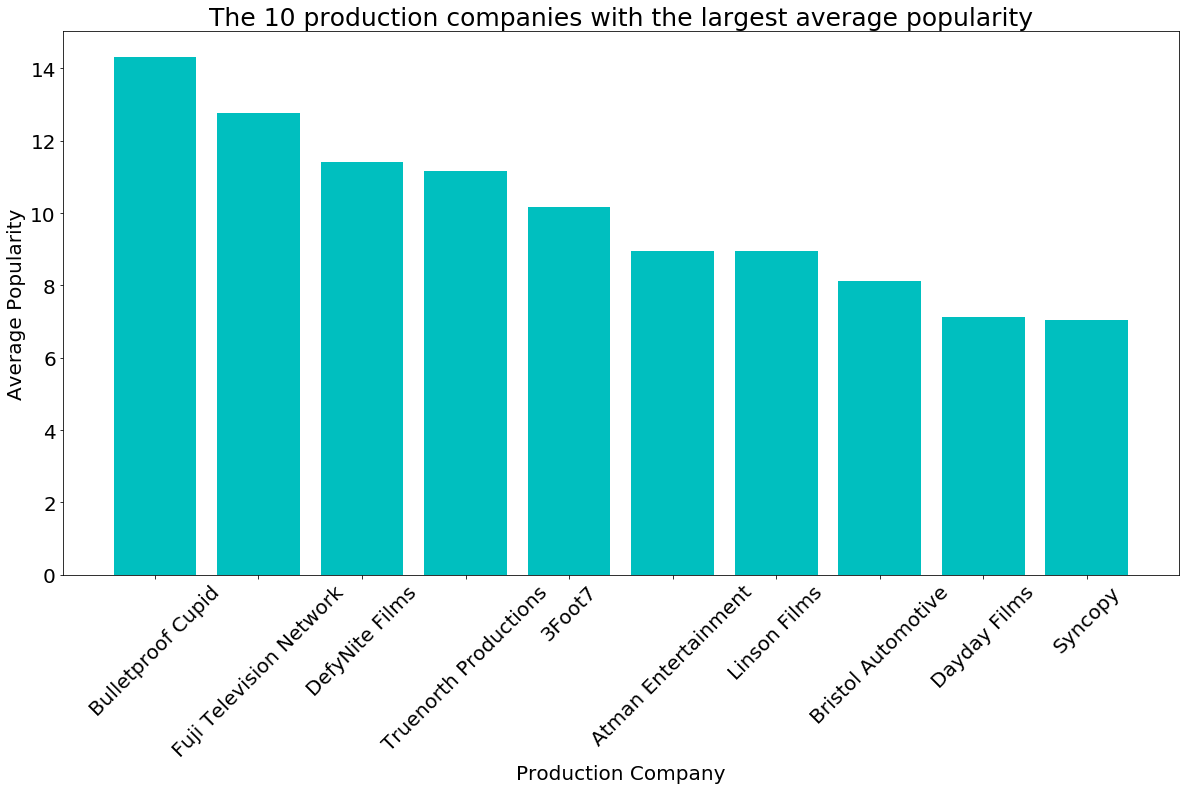

In [65]:
titles = ['The 10 production companies with the largest average popularity','Production Company','Average Popularity']
plot_bar_chart(10,df_prod_1['popularity'],df_prod_1['production_companies'],titles,tick_rotation=45)




In [66]:
df_prod_2 = prod_averages.nlargest(10,'vote_average')
df_prod_2

,production_companies,popularity,vote_count,vote_average,release_year
2117,EMI,0.212010,23.0,8.7,2006.0
6039,SMV Enterprises,0.212010,23.0,8.7,2006.0
1027,Brain Farm Digital Cinema,0.321341,60.0,8.5,2011.0
2160,Edel records GmbH,0.302908,14.0,8.5,1981.0
5784,Red Bull Media House,0.321341,60.0,8.5,2011.0
507,Arnold Stiefel Company,0.283191,23.0,8.4,1984.0
784,Beanca Films,0.054380,11.0,8.4,2013.0
2672,Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDE...,0.054380,11.0,8.4,2013.0
4280,MPN Cologne Film 3,0.054380,11.0,8.4,2013.0
6818,Talking Heads,0.283191,23.0,8.4,1984.0


In [67]:
df_prod_2.at[2672,'production_companies'] = "FIDECINE"

This production company has a long name that wont show up well on the bar chart and has some improperly formatted characters so it makes sense to use its acronym provided

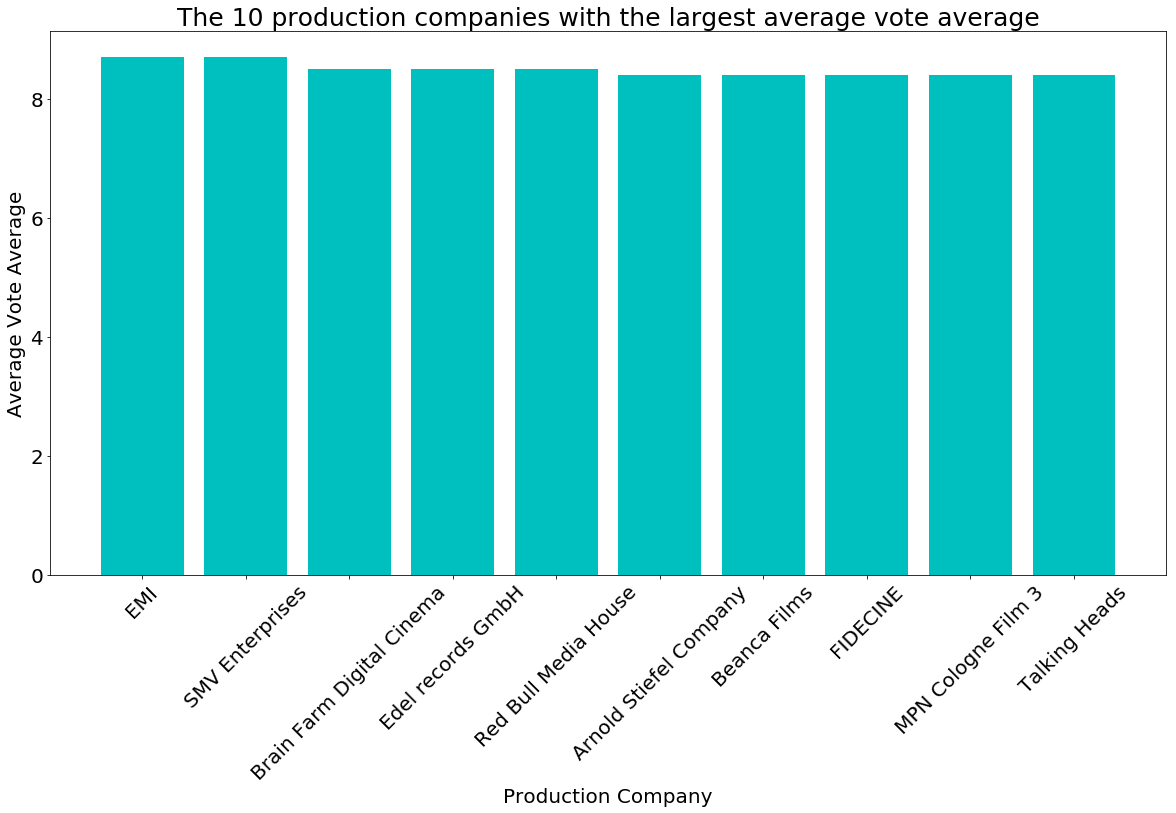

In [68]:
titles = ['The 10 production companies with the largest average vote average','Production Company','Average Vote Average']
plot_bar_chart(10,df_prod_2['vote_average'],df_prod_2['production_companies'],titles,tick_rotation=45)

#### 6. How does popularity and vote average relate?

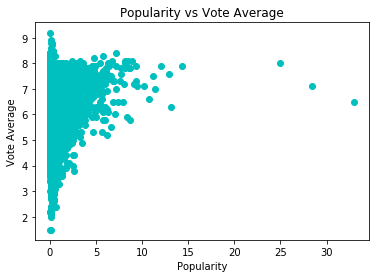

In [69]:
titles=['Popularity vs Vote Average','Popularity','Vote Average']
plot_scatter_chart(df_popular['popularity'],df_popular['vote_average'],titles)



There is no clear trend that can be easily drawn from this as a low popularity movie can have basically any vote average. It can be seen that no movie with popularity greater than about 5 had a vote average below 5.

### 2. Profitability

#### 1. Which movies had the greatest profitability?

In [70]:
df_profit.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3805.000000,3805.000000
mean,1.203784,534.159001,6.170565,2001.229172,4.471977e+01,138.715934,93.996169
std,1.480569,883.757588,0.792437,11.329616,4.488697e+01,216.997311,195.033250
min,0.010335,10.000000,2.200000,1960.000000,9.693980e-07,0.000002,-413.912431
25%,0.470651,74.000000,5.700000,1995.000000,1.354637e+01,19.253711,-1.420000
50%,0.810805,209.000000,6.200000,2004.000000,3.038360e+01,62.846878,28.513340
75%,1.387163,584.000000,6.700000,2010.000000,6.084153e+01,165.805400,109.026621
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+02,2827.123750,2750.136651


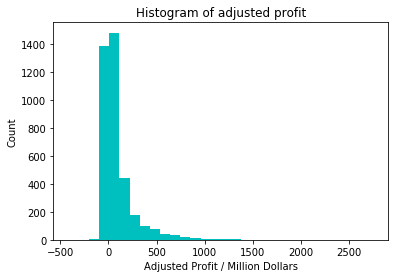

In [71]:
plt.hist(df_profit['profit_adj'],bins = 30,color = 'c')
plt.title('Histogram of adjusted profit')
plt.xlabel('Adjusted Profit / Million Dollars')
plt.ylabel('Count');



About 25% of movies made a loss, a further 25% made less than 28.5 million dollars in adjusted value and a further 25% made between 28.5 and 109 million dollars in adjusted value. The greatest loss was a loss of 413 million in  adjusted value and the greatest profit was 2750 million.

In [72]:
df_profit_1 = df_profit.nlargest(10,'profit_adj')
df_profit_1

,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,39.575591,2789.712242,2750.136651
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240.886903,2827.123750,2586.236848
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271.692064,2506.405735,2234.713671
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,39.289277,2167.324901,2128.035625
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28.362748,1907.005842,1878.643094
8889,2.900556,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,23.726245,1791.694309,1767.968064
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183.999919,1902.723130,1718.723211
8094,1.136610,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,31.481271,1583.049536,1551.568265
10110,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,Walt Disney Productions,2061-01-25,913,6.6,1961,29.179445,1574.814740,1545.635295
7309,5.488441,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1980-01-01,3954,8.0,1980,47.628662,1424.626188,1376.997526


Here are the top 10 movies in terms of adjusted profit value. 

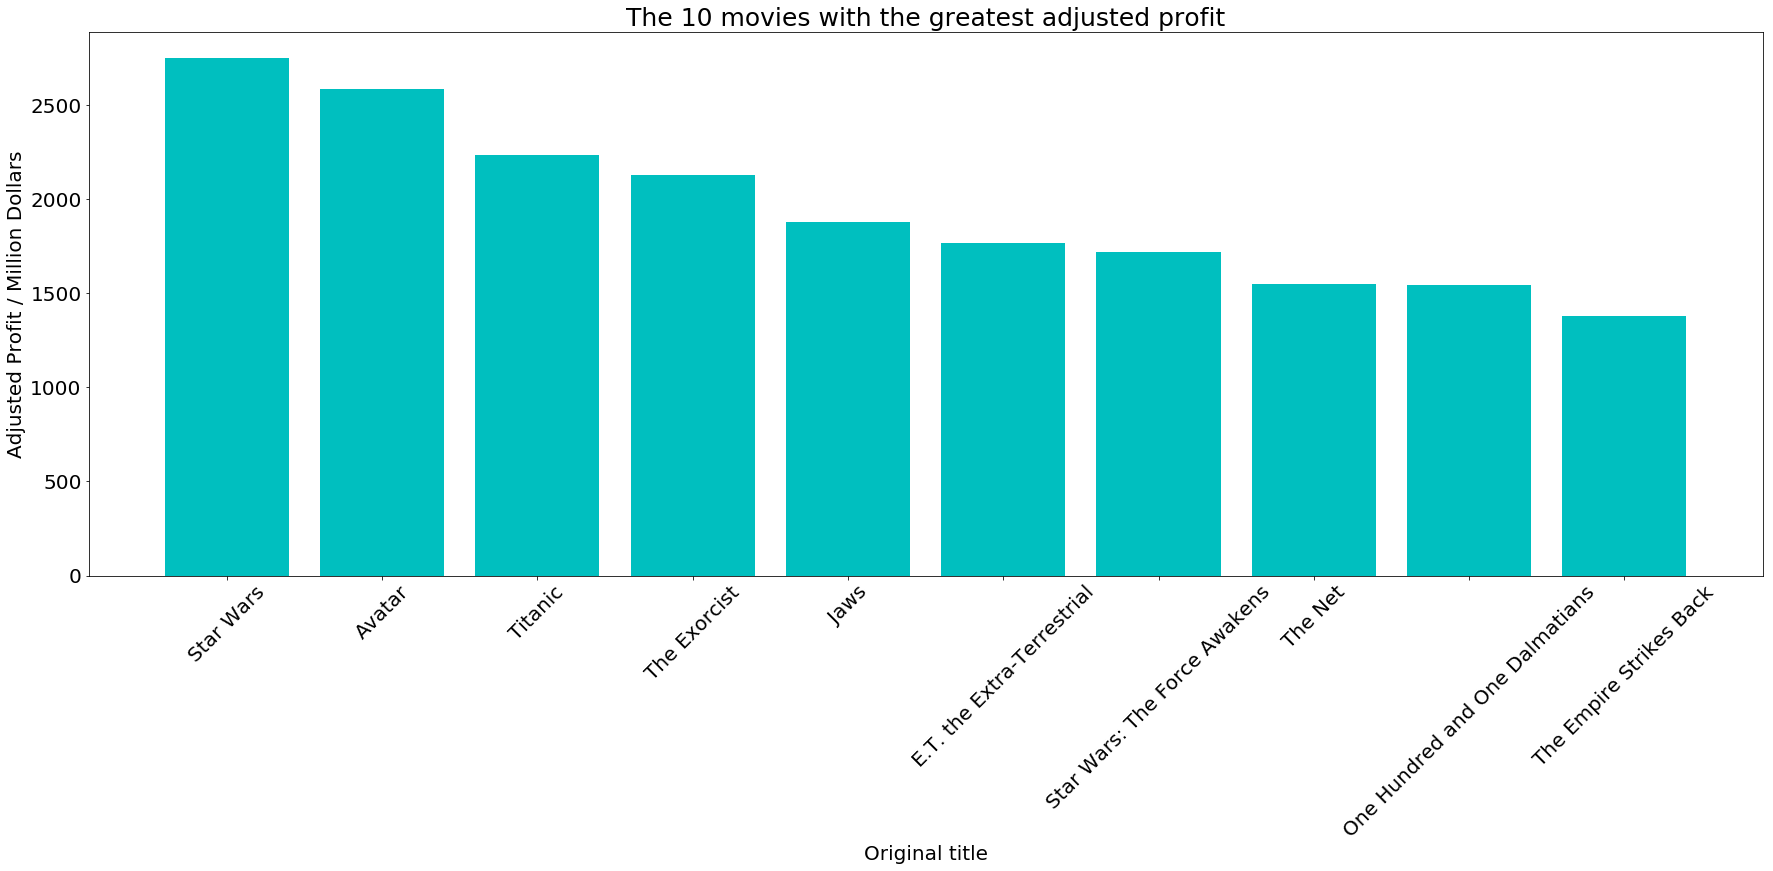

In [73]:
titles = ['The 10 movies with the greatest adjusted profit','Original title','Adjusted Profit / Million Dollars']
plot_bar_chart(10,df_profit_1['profit_adj'],df_profit_1['original_title'],titles,size=(30,10),tick_rotation=45)

#### 2. Which cast members were part of the most profitable movies on average?

In [74]:
df_profit_cast_1 = df_profit_cast.groupby('cast').mean()
df_profit_cast_1.head(1)

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
cast,,,,,,,
50 Cent,1.729764,592.0,6.4,2010.6,39.765254,65.959013,26.193759


In [75]:
df_profit_cast_plot = df_profit_cast_1.nlargest(10,'profit_adj').reset_index()

The same analysis of profitabilty for prominent cast members in the movies.

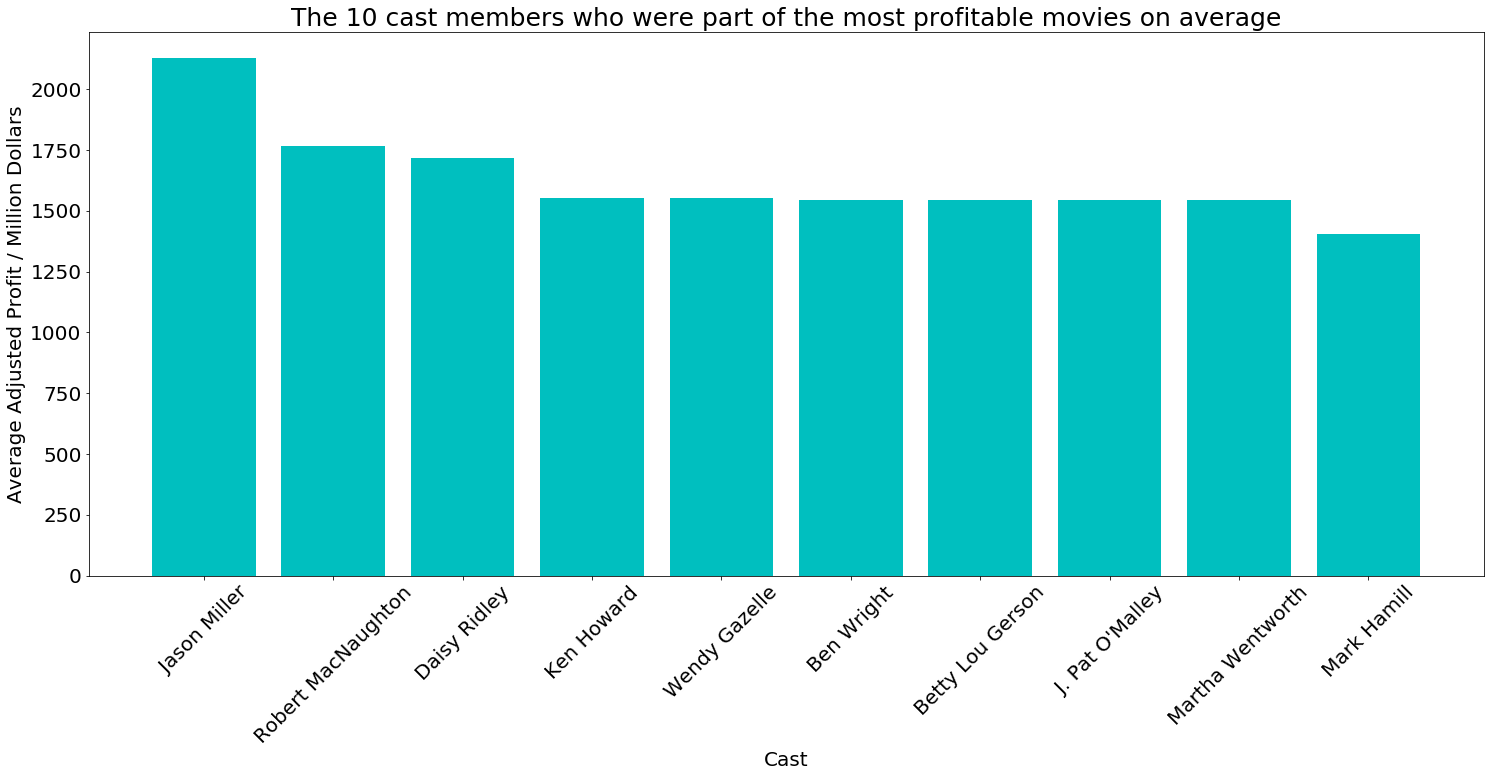

In [76]:
titles = ['The 10 cast members who were part of the most profitable movies on average','Cast','Average Adjusted Profit / Million Dollars']
plot_bar_chart(10,df_profit_cast_plot['profit_adj'],df_profit_cast_plot['cast'],titles,size=(25,10),tick_rotation=45)

Jason Miller has the greatest average.

#### 3. What is the average profitability per genre?

In [77]:
df_profit_genres_1 = df_profit_genres.groupby('genres').mean().reset_index()

In [78]:
df_profit_genres_1.sort_values(by='profit_adj',ascending=False,inplace=True)
df_profit_genres_1

,genres,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
2,Animation,1.724374,897.552764,6.387940,2003.989950,84.047843,293.577789,209.529946
1,Adventure,1.880773,963.547779,6.127052,2000.156124,81.797862,273.510275,191.712414
7,Family,1.482102,692.223022,6.134293,2001.652278,72.148073,248.116758,175.968685
8,Fantasy,1.758474,900.686076,6.066076,2001.197468,80.394895,250.609388,170.214493
15,Science Fiction,1.879384,972.292070,6.026306,1999.912959,65.870569,202.934658,137.064089
0,Action,1.578319,811.049257,6.038197,2000.655204,66.948639,196.924384,129.975745
12,Music,0.923735,290.702290,6.308397,1998.740458,36.321369,139.643625,103.322256
18,War,1.246129,563.394958,6.586555,1997.932773,57.272947,155.898112,98.625164
17,Thriller,1.267477,551.930486,6.069347,2001.230318,44.928474,129.163037,84.234563
3,Comedy,1.025128,402.413483,6.024569,2001.616479,39.733565,123.256586,83.523021


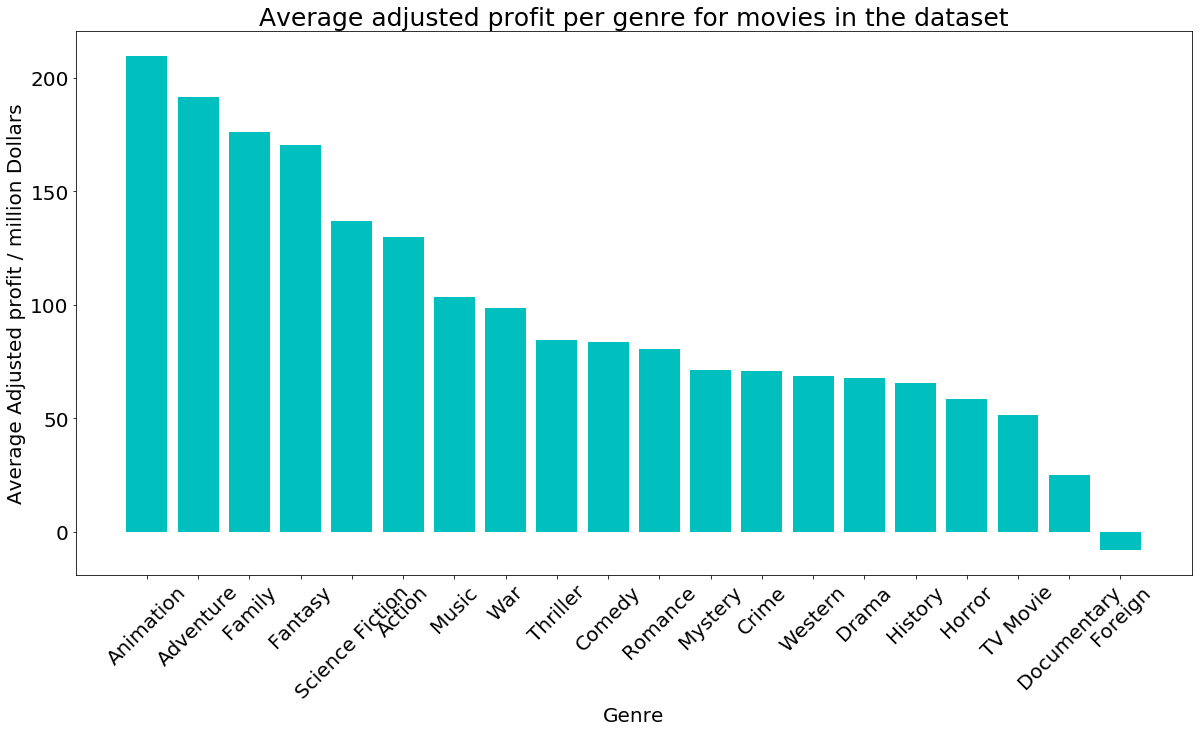

In [79]:
titles=['Average adjusted profit per genre for movies in the dataset','Genre','Average Adjusted profit / million Dollars']
plot_bar_chart(20,df_profit_genres_1['profit_adj'],df_profit_genres_1['genres'],titles,tick_rotation=45)

Animation is the most profitable and foreign the least with a loss on average.

#### 4. Which directors were part of the most profitable movies on average?

In [80]:
df_profit_dir_1 =  df_profit_dir.groupby('director').mean()
df_profit_dir_1.head(1)

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
director,,,,,,,
FrÃ©dÃ©ric Jardin,0.434506,28.0,5.9,2011.0,2.423495,0.003255,-2.42024


In [81]:
df_profit_dir_plot = df_profit_dir_1.nlargest(10,'profit_adj').reset_index()

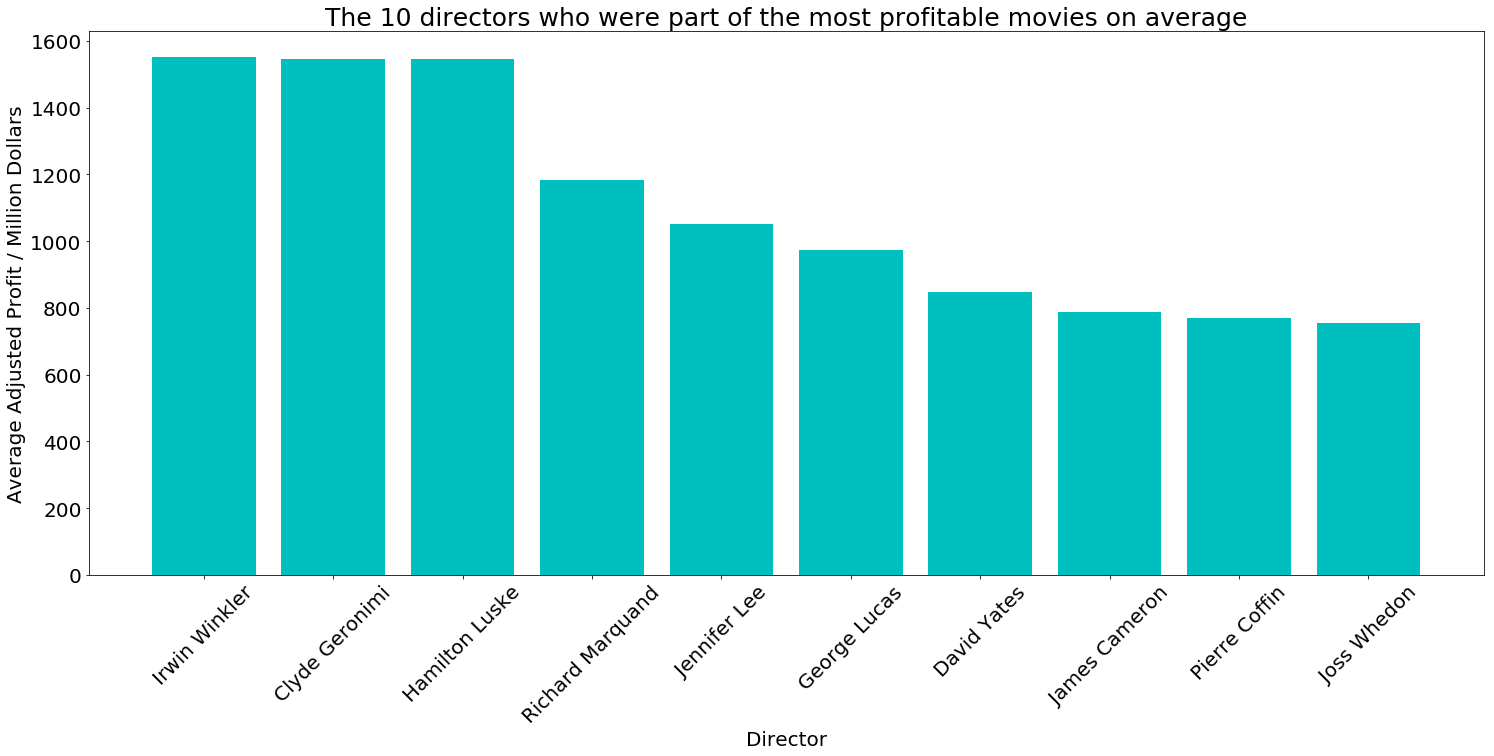

In [82]:
titles = ['The 10 directors who were part of the most profitable movies on average','Director','Average Adjusted Profit / Million Dollars']
plot_bar_chart(10,df_profit_dir_plot['profit_adj'],df_profit_dir_plot['director'],titles,size=(25,10),tick_rotation=45)

Irwin Winkler directed the movies with the greatest average adjusted profit.

#### 5. Which productions companies are part of the most profitable movies on average?

In [83]:
df_profit_prod_1 =  df_profit_prod.groupby('production_companies').mean()
df_profit_prod_1.head(1)

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
production_companies,,,,,,,
"""DIA"" Productions GmbH & Co. KG",1.626534,152.0,5.7,2003.0,42.672695,52.571487,9.898792


In [84]:
df_profit_prod_plot = df_profit_prod_1.nlargest(10,'profit_adj').reset_index()
df_profit_prod_plot

,production_companies,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,Hoya Productions,2.010733,1113.000000,7.200000,1973.000000,39.289277,2167.324901,2128.035625
1,Truenorth Productions,11.173104,5292.000000,7.500000,2015.000000,183.999919,1902.723130,1718.723211
2,Alfran Productions,5.738034,3970.000000,8.300000,1972.000000,31.287366,1277.913732,1246.626367
3,Argyle Enterprises,1.313676,620.000000,7.200000,1965.000000,56.748622,1129.534862,1072.786240
4,EMI Films,1.104816,600.000000,7.000000,1977.000000,71.955621,1092.964989,1021.009368
5,Julia Phillips and Michael Phillips Productions,1.104816,600.000000,7.000000,1977.000000,71.955621,1092.964989,1021.009368
6,MIRACLE Productions GmbH & Co. KG,6.012584,3458.000000,7.200000,2002.000000,121.226139,1062.775601,941.549462
7,Disney Enterprises,3.440519,3692.000000,7.400000,2003.000000,111.423149,1024.886690,913.463541
8,Lucasfilm,4.050399,2238.466667,6.960000,1991.866667,84.309729,956.459831,872.150102
9,Lightstorm Entertainment,3.139564,2480.000000,6.814286,1996.714286,154.581703,989.935078,835.353375


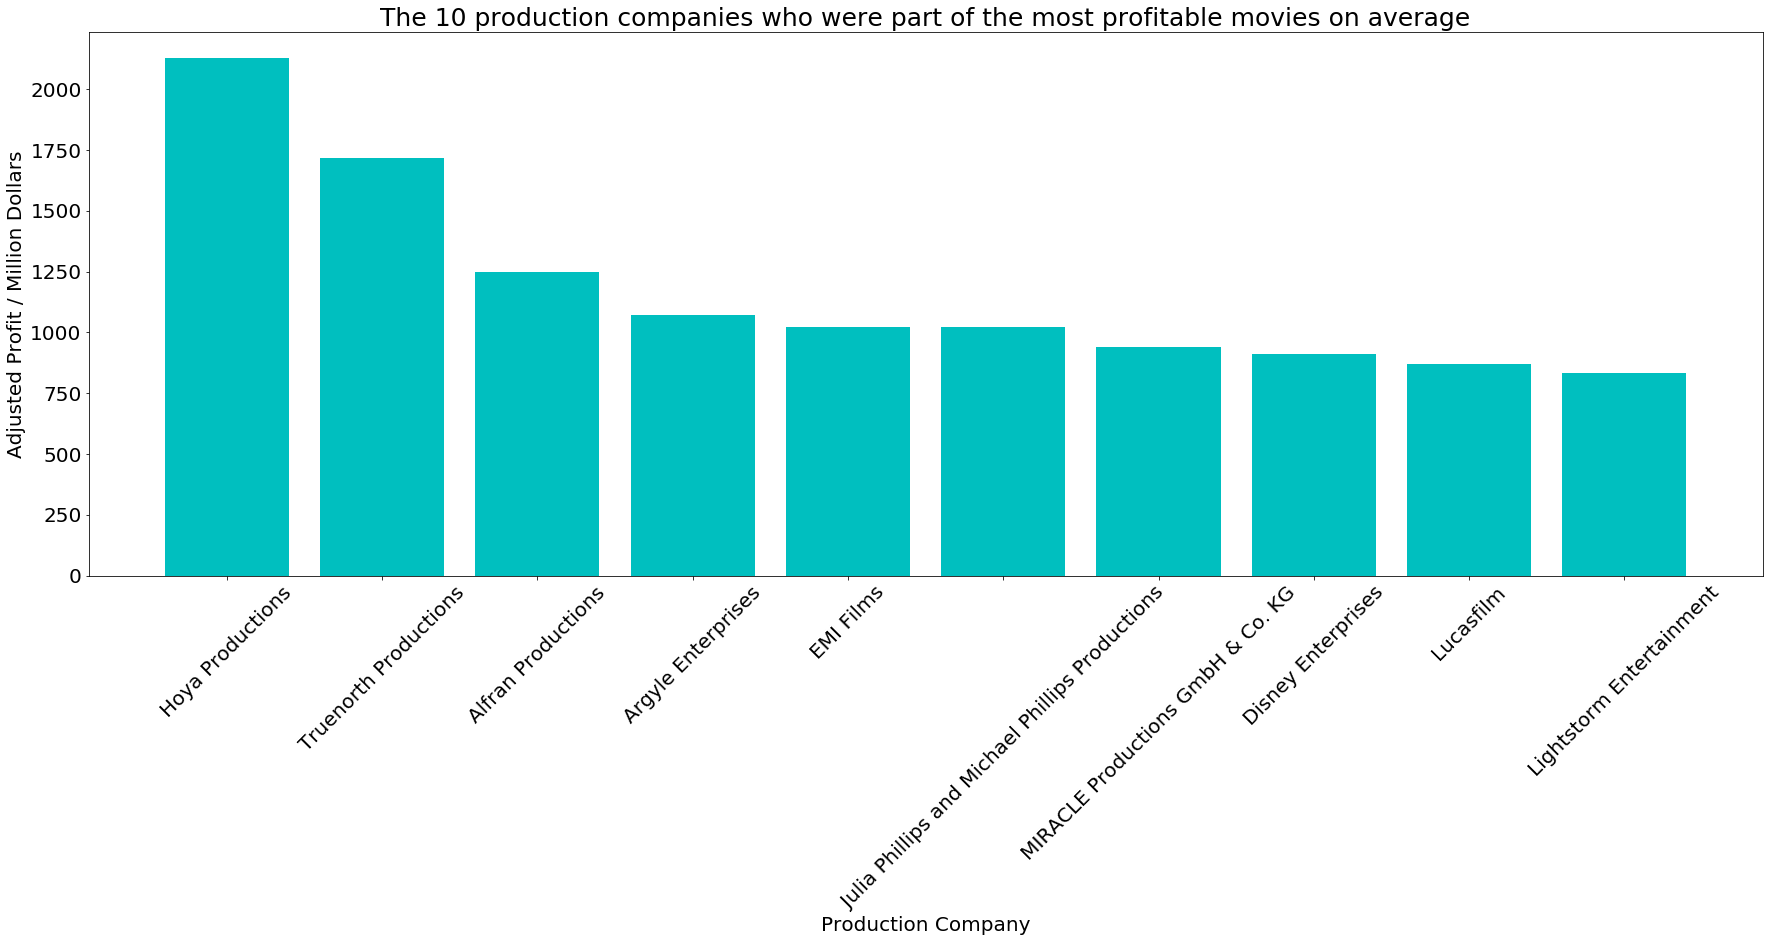

In [85]:
titles = ['The 10 production companies who were part of the most profitable movies on average','Production Company','Adjusted Profit / Million Dollars']
plot_bar_chart(10,df_profit_prod_plot['profit_adj'],df_profit_prod_plot['production_companies'],titles,size=(30,10),tick_rotation=45)

#### 6. How does profitabilty relate to popularity and vote average?

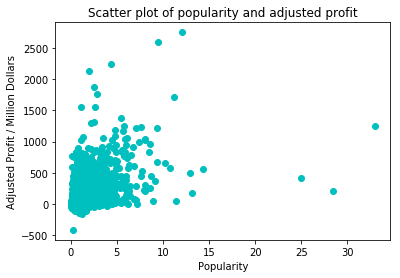

In [86]:
titles=['Scatter plot of popularity and adjusted profit','Popularity','Adjusted Profit / Million Dollars']
plot_scatter_chart(df_profit['popularity'],df_profit['profit_adj'],titles)

It is difficult to draw any trends between increased popularity and adjusted profit. Less popular movies can have almost any adjusted profit and higher popular movies dont have a greater adjusted profit necessarily. There are also fewer higher popularity movies to allow for a distinction between less and more popular movies.

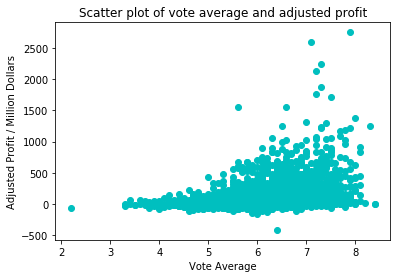

In [87]:
titles=['Scatter plot of vote average and adjusted profit','Vote Average','Adjusted Profit / Million Dollars']
plot_scatter_chart(df_profit['vote_average'],df_profit['profit_adj'],titles)

Once again it is difficult to draw trends. Many movies that have adjusted profit less than 500 million have both high and low vote averages. It does seem however that only movies above a vote average of 5 have a chance to have an adjusted profit above 1 billion (1000 million).

<a id='conclusions'></a>
## Conclusions

First, analysis was performed on various aspects of the dataset and how they related to the popularity and the vote average.

Overall Jurassic world was found to have the greatest popularity and The Story of Film: An Odyssey was found to have the greatest vote average.

Josh Helman appeared in only one extremely popular movie giving him the greatest average. Agnes de Mille has the greatest average vote average.

In terms of genre Adventure is the most popular and documentary the least popular. Documentary is however the genre with the greatest average vote average with horror having the lowest average vote average. The most common genre was Drama and the least was Western.

Colin Trevorrow was the director with the greatest average popularity per movie and Mark Cousins had the greatest average vote average. Harold P Warren had the lowest average vote average.

Bulletproof Cupid was the production company with the greatest average popularity and EMI had the greatest average vote average.

No clear trend could be drawn between popularity and vote average, it was observed that in the dataset no movies with popularity above 5 had a vote average below 5 but this is unlikely to be a hard rule.

The data set was also analyzed in terms of adjusted profit. Star Wars had the greatest adjusted profit. 

In terms of the average adjusted profit per cast member Jason Miller was the greatest on average.

Animation had the greatest average adjusted profit and Foreign had the lowest making a loss on average.

Irwin Winkler directed the movies with the greatest average adjusted profit.

Hoya Productions produced the movies with the greatest average adjusted profit.

It was difficult to draw trends between popularity and adjusted profit and vote avera and adjusted profit especially since movies with low popularity could have vastly different profit low profit movies could have almost any vote average.

### Limitations

Overall many null values were found for the budget and revenue columns leading to many movies having no usable data for assessing profit.

Popularity had a large number of small values and so the vast majority of movies could be considered unpopular according to the dataset. It was thus only meaningful to consider very popular movies and the greatest average popularity in the cast, genre , director and production company categories.

Only a few cast members are listed per movie and so non leading cast members who could be leading on other movies could not be included in the analysis. If some cast had smaller roles in the other movies this could be included in their averages.

Some genres featured in many more movies than others which could have influenced the average values calculated per genre.

The data for vote average was potentially influenced by low vote counts in some cases. This likely lead to some movies being over or undervalued in some cases.

### Additional Research and information

One way to analyse further would be to limit the the vote averages to vote counts above a certain threshold to reduce the effect of a small number of over or undervalued scores.

The revenue and budget numbers could be filled in with information from other datasets to improve the profitabilty analysis

Documentation referred to:

Pandas documentation: https://pandas.pydata.org/docs/

Matplotlib docs: https://matplotlib.org/stable/index.html

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0